In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../data/heart_disease_cleaned.csv")

In [4]:
X = df.drop(columns='target')
y = df['target']

In [5]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
feature_importances = rf.feature_importances_

In [6]:
fi_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

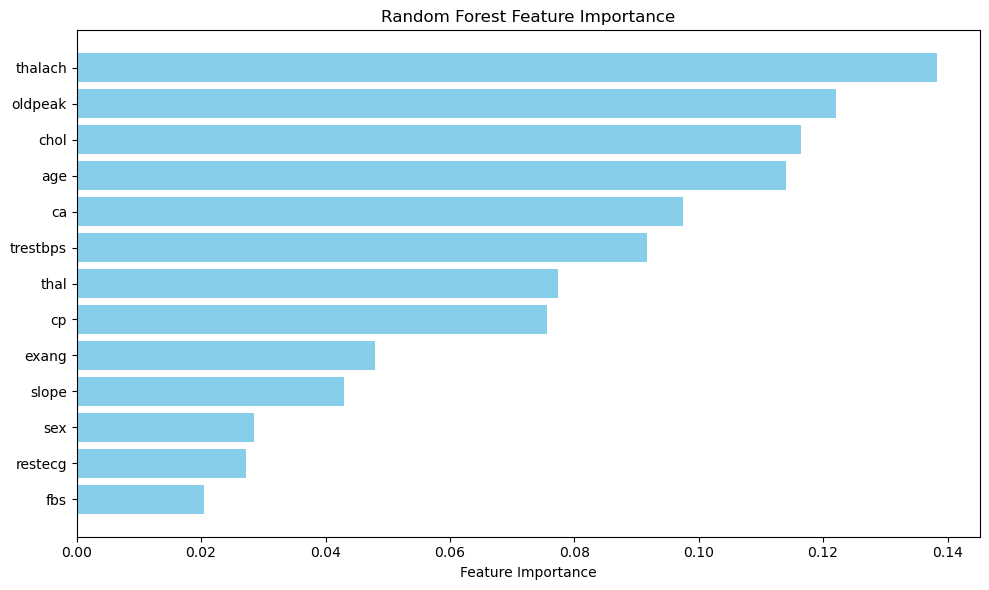

In [7]:
plt.figure(figsize=(10, 6))
plt.barh(fi_df['Feature'], fi_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

In [8]:
print("Top Features (Random Forest):")
print(fi_df)

Top Features (Random Forest):
     Feature  Importance
7    thalach    0.138306
9    oldpeak    0.122138
4       chol    0.116422
0        age    0.113967
11        ca    0.097398
3   trestbps    0.091751
12      thal    0.077441
2         cp    0.075563
8      exang    0.047884
10     slope    0.042916
1        sex    0.028483
6    restecg    0.027269
5        fbs    0.020461


In [12]:
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=5)

In [15]:
rfe_features = X.columns[rfe.support_].tolist()
print("\nTop Features (RFE):")
print(rfe_features)


Top Features (RFE):
['cp', 'restecg', 'oldpeak', 'ca', 'thal']


In [18]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
chi2_selector = SelectKBest(score_func=chi2, k=5)
chi2_selector.fit(X_scaled, y)

SelectKBest(k=5, score_func=<function chi2 at 0x0000016D214AB100>)

In [23]:
chi2_features = X.columns[chi2_selector.get_support()].tolist()
print("\nTop Features (Chi-Square):")
print(chi2_features)


Top Features (Chi-Square):
['exang', 'oldpeak', 'slope', 'ca', 'thal']


In [25]:
selected_features = list(set(rfe_features + chi2_features + fi_df.head(5)['Feature'].tolist()))
print("\nFinal Selected Features:")
print(selected_features)


Final Selected Features:
['exang', 'slope', 'thal', 'cp', 'age', 'chol', 'restecg', 'thalach', 'oldpeak', 'ca']


In [28]:
df_reduced = df[selected_features + ['target']]
df_reduced.to_csv('../data/heart_disease_selected_features.csv', index=False)
print("Reduced dataset saved as 'heart_disease_selected_features.csv'")

Reduced dataset saved as 'heart_disease_selected_features.csv'
